# Fordgobike Data Exploration
# By Mostafa Ibrahim

## Preliminary Wrangling

This document explores a dataset containing the trip data of the ford gobike.

In [128]:
# import all packages that I will use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [129]:
# load the Dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [130]:
# I will copy the dataset for changes 
dataset=df.copy()

In [131]:
#Discover the dimensions of the Dataset
print('Number of rows: ',dataset.shape[0])
print('Number of columns: ',dataset.shape[1])

Number of rows:  183412
Number of columns:  16


In [132]:
#Preprocessing operations of Dataset
#check for info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [133]:
#check for missing values
dataset.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [134]:
#remove missing values
dataset.dropna(inplace=True)
dataset.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [135]:
#check for duplicates in the dataset
dataset.duplicated().sum()

0

In [136]:
#split datatime into new columns
dataset['start_time']=pd.to_datetime(dataset['start_time'])
dataset['start_date']=dataset.start_time.dt.strftime('%Y-%m-%d')
dataset['start_day']=dataset.start_time.dt.strftime('%A')
dataset['start_month']=dataset.start_time.dt.strftime('%B')
dataset['start_hour']=dataset.start_time.dt.strftime('%H')

In [137]:
dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day,start_month,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,Thursday,February,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,Thursday,February,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,Thursday,February,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,Thursday,February,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,Thursday,February,23


In [138]:
#make a conversion of both
#1- duration_sec into duration_minute to be more clear in visualization
#2- calculate age based on member_bith_year and this year(2021)

dataset['duration_min']=dataset['duration_sec']/60
dataset['member_age']=2021-dataset['member_birth_year']
dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day,start_month,start_hour,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,Thursday,February,17,869.750000,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,Thursday,February,12,1030.900000,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,Thursday,February,17,608.166667,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,Thursday,February,23,26.416667,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2019-02-28,Thursday,February,23,29.883333,62.0


In [139]:
dataset.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,11.733379,36.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,27.370082,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.016667,20.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,5.383333,29.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,8.500000,34.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,13.150000,41.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1409.133333,143.000000


Text(0.5, 1.0, 'show outliers in Age')

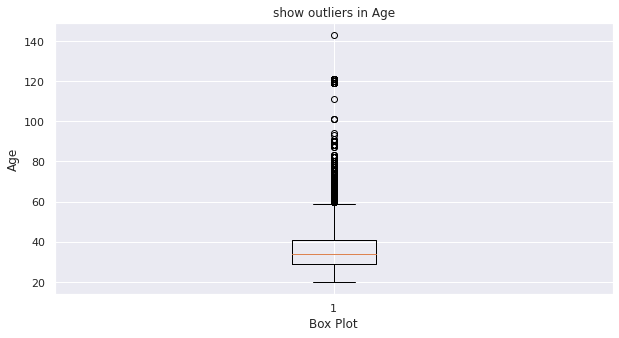

In [140]:
# from description , we notice that max for member_age is 143 , there may be outliers
# I will visualize member_age to show if there are more outliers
plt.figure(figsize=[10,5])
plt.boxplot(dataset['member_age'])
plt.xlabel('Box Plot')
plt.ylabel('Age')
plt.title('show outliers in Age')

There are outliers more than 59 in member_age,

so we will show the number of these instances and show if they need a study alone or not

In [141]:
data_out=dataset[dataset['member_age']>59]

In [142]:
data_out.shape

(5781, 22)

In [143]:
dataset.shape

(174952, 22)

In [144]:
#It is a small number in a comparison of the size of dataset
# we will drop the outliers
indices=data_out.index
dataset.drop(index=indices)
dataset.shape

(174952, 22)

### What is the structure of your dataset?

Fordgobike is a dataset with 174952 and 22 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip,start_date,start_day,start_month,start_year,duration_min,member_age).
Most variables are 11 numerical, and others are 1 datetime, 10 object type.


### What is/are the main feature(s) of interest in your dataset?

I want to find the relation between if the user type is customer or subscriber with duration time.

I want to find the relation if the age affacts the duration time or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The new features that I have made before such as member age and duration in minute will help me in the analysis process.

## Univariate Exploration

I would to begin with which days the trips go on.

Text(0.5, 1.0, 'Frequency Vs. Day Of Trip')

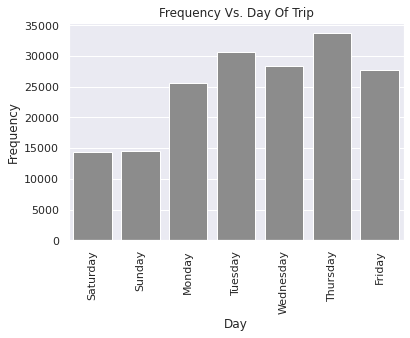

In [145]:
#counting for start day
order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
base_color=sb.color_palette()[7]
sb.countplot(data=dataset, x='start_day',order=order,color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Frequency Vs. Day Of Trip')

we notice that the most frequent day of all trips is Thursday

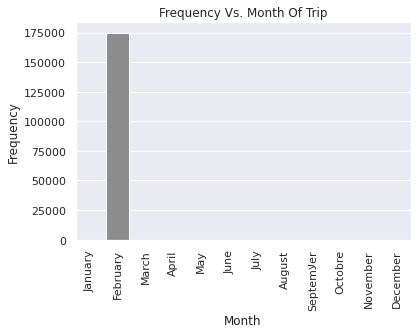

In [146]:
#Counting for start month
order=['January','February','March','April','May','June','July','August','Septemﻻer','Octobre','November','December']
color_base=sb.color_palette()[6]
sb.countplot(data=dataset, x='start_month', color=base_color,order=order);
plt.xlabel('Month');
plt.xticks(rotation=90);
plt.ylabel('Frequency');
plt.title('Frequency Vs. Month Of Trip');

We notice that February Month is the begin for each trip

so, We can conclude that Thursday of February month is the suitable date for going on a trip

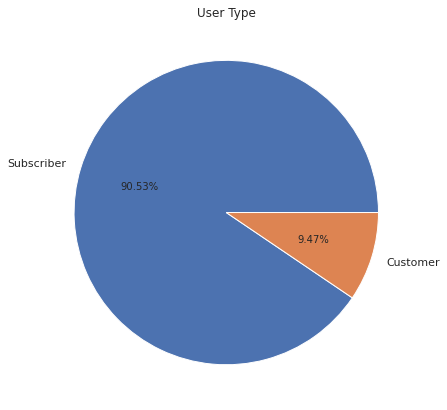

In [147]:
#Visualize the percentage of the number of customers and Subscribers
types_of_users=dataset.user_type.value_counts()
plt.figure(figsize=[10,7])
plt.pie(types_of_users,labels=types_of_users.index,autopct= '%0.2f%%')
plt.title('User Type');

we notice
* The percentage of the Subscriber is greater than the percentage of the customers goin on the trips.

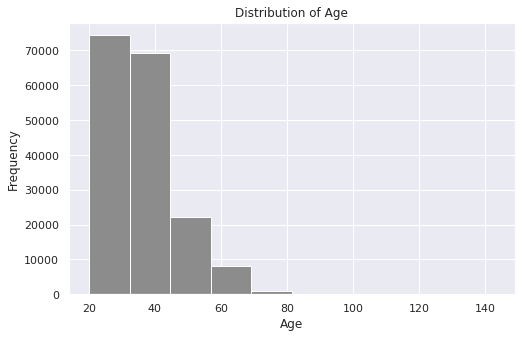

In [148]:
#visualize the age distribution for people going on the trip.
plt.figure(figsize=[8,5])
color_base=sb.color_palette()[0]
plt.hist(data = dataset, x = 'member_age',color=base_color)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

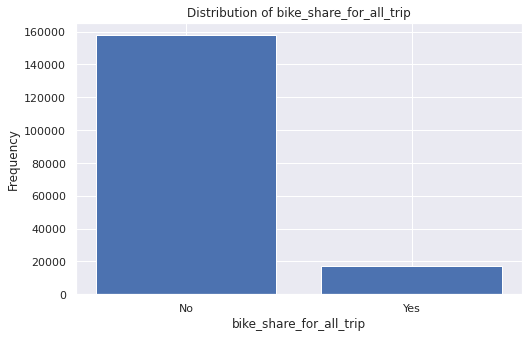

In [149]:
# visualize bike_share_for_all_trip

#visualize the age distribution for people going on the trip.
plt.figure(figsize=[8,5])
plt.bar(x = dataset.bike_share_for_all_trip.unique(), height = dataset.bike_share_for_all_trip.value_counts() )
plt.title('Distribution of bike_share_for_all_trip')
plt.xlabel('bike_share_for_all_trip')
plt.ylabel('Frequency')
plt.show()

The majority of users do not share bike for all trip

* From the visual, we notice that the age varies from the range 20 and 45 years old for all users whatever they are subscribers or customers that are the most frequent(Young people)

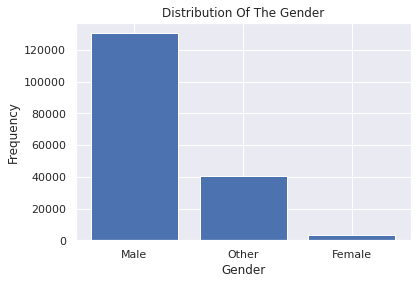

In [150]:
#Visualize the Gender for users
plt.bar(x = dataset.member_gender.unique(), height = dataset.member_gender.value_counts())
plt.title('Distribution Of The Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

We notice, Male gender is the most frequent in the data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The majority is for Subscribers users and the trip consists of men more than the other gender,we also noticed that the young people are the most frequent in the trip.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
We calculated the age for each user according to the birth year

We split the month and day from datetime to make the visualization more clear and get more insights from the data

There where outliers after visualizing the member age and we removed them.
## Bivariate Exploration

I would like to look at the duration in min correlated with other features in the dataset.

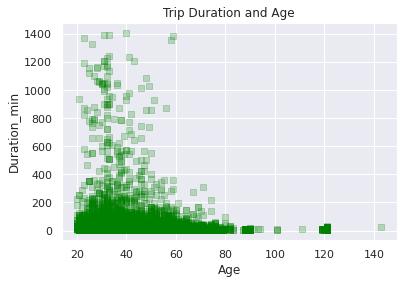

In [151]:
plt.scatter(dataset['member_age'], dataset['duration_min'], alpha = 0.22, marker = 's',color='green' )
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_min')
plt.show()

We notice,

The most frequent users aged in the range 20 and 45 have higher duration in the trip.

I would like to look at the duration dependency on Gender.


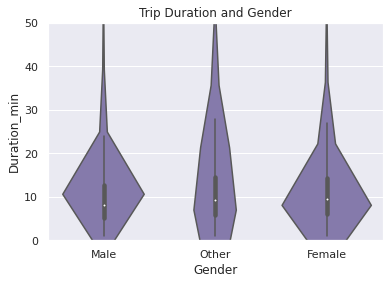

In [152]:
base_color = sb.color_palette()[4]
sb.violinplot(data = dataset, x = dataset['member_gender'], y = dataset['duration_min'], color = base_color)
plt.ylim([0, 50])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_min')
plt.show()

We notice
* Although the number of male users is high than others, the female and others makes high duration in the trip than the male.

I would like to look at the duration and bike_share_for_all_trip.

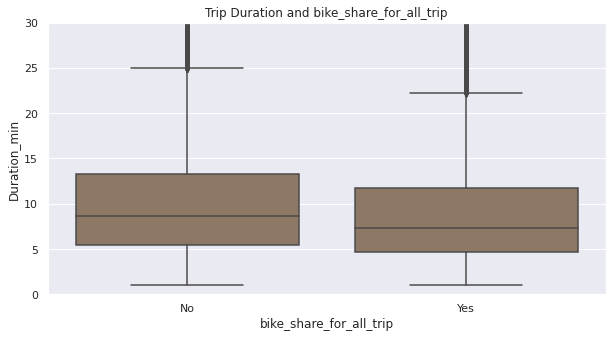

In [153]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[5]
sb.boxplot(data = dataset, x = 'bike_share_for_all_trip', y = 'duration_min', color = base_color)
plt.ylim([0, 30])
plt.title('Trip Duration and bike_share_for_all_trip')
plt.xlabel('bike_share_for_all_trip')
plt.ylabel('Duration_min')
plt.show()

we notice 
* The users who do not make bike_share_for_all_trip takes little higher duration than who make bike_share_for_all_trip .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We have showed the aged people between 20 to 45, the trip duration is higher. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The features which are bike_share_for_all_trip and gender for users that are female and do not share bikes having higher trip duration.

The value of male members is very high but it has lower trip duration. 
For users who do not make bike_share_for_all_trip are very high,however they have approximately value from users who make bike_share_for_all_trip for making high duration.

## Multivariate Exploration

I want to discover the relation between user types and other features such as age or Bike_sharing_for_all_trip accroding to duration trip.

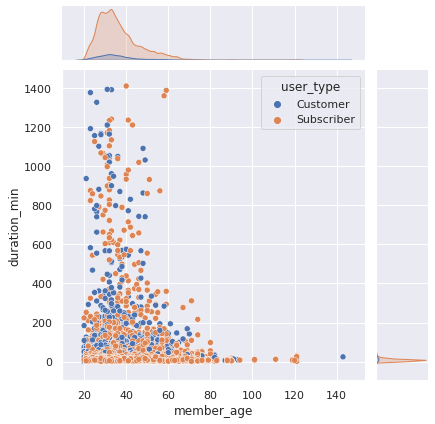

In [154]:
sb.jointplot(data=dataset, x='member_age', y='duration_min', hue='user_type',kind='scatter')

we notice 

* Although the percentage of subscribers is higher than the percentage of the customers, there are many young customers make high duration trip.

Text(16.085100150277967, 0.5, 'Duration in min')

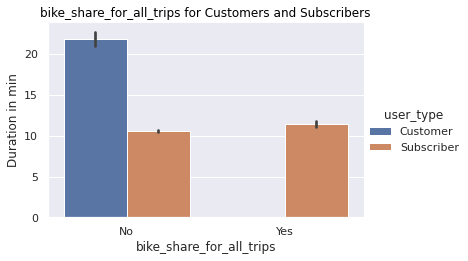

In [155]:
sb.catplot(data=dataset, x='bike_share_for_all_trip', y='duration_min', hue='user_type',kind='bar',height=3.27,aspect=9.7/6.27)
plt.title("bike_share_for_all_trips for Customers and Subscribers", color = 'black')
plt.xlabel('bike_share_for_all_trips')
plt.ylabel('Duration in min')

We notice
* There are not Customers making bike_share_for_all_trips and the cutomers who do not make bike_share_for_all_trips have higher duration than the subscribers who do not make bike_share_for_all_trips

Text(12.561342977496949, 0.5, 'Trip Duration in min')

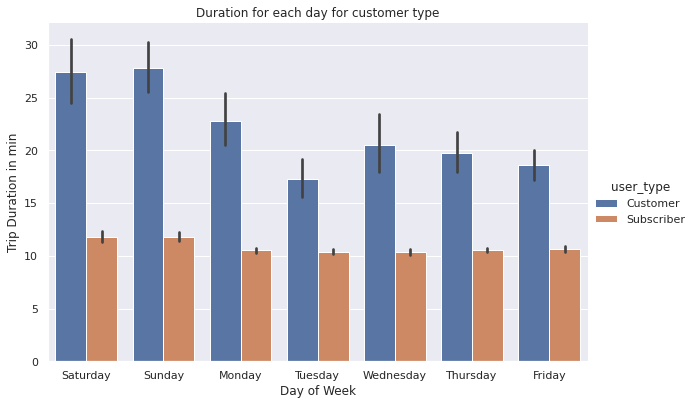

In [156]:
order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sb.catplot(data=dataset, x='start_day', y='duration_min', hue='user_type',kind='bar',order=order,height=5.27,aspect=9.7/6.27)
plt.title('Duration for each day for customer type')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration in min')

We Notice
* The customers have large duration trip within days than the subscribers
* The Subscribers are almost consistent through all weekdays

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Although the percentage of male is high, the percentage of female is high for duration trip than male
* the Customers who do not make share for bikes have higher duration than the subscribers
* Young aged users make higher duration than old aged users whatever customers or subscribers

### Were there any interesting or surprising interactions between features?
* Through the analysis of both customers and subscribers, we noticed that the subscribers are almost consistent through all weekday for duration trip unlike customers.